# Transforming Target

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from helper import (plot_exponential_data, 
                    plot_square_normal_data)

import warnings
warnings.simplefilter("ignore")

### Load Data
- helper.py file is include boston data 


In [2]:
from helper import boston_dataframe
boston_data = boston_dataframe()

In [4]:
print(boston_data.head())
print(boston_data.shape)

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
(506, 14)


### MEmvisualisasikan kolom target
- mengecek apakah kolom target berdistribusi normal

<AxesSubplot:>

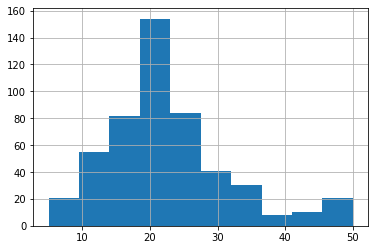

In [6]:
boston_data["MEDV"].hist()

Terlihat bahwa grafik merupakan grafik yang mencirikan data right tail

In [8]:
from scipy.stats.mstats import normaltest
#mengecek p value distribusi

Test distribusi normal
- hipotesa null H0 = data tidak berdistribusi normal
- hipotesa 1 = data berdistibusi normal berdistribusi normal
- jika p-value lebih besar dari 0.05 (p>0.05) maka menolak hipotesa null

In [9]:
normaltest(boston_data["MEDV"].values)

NormaltestResult(statistic=90.9746873700967, pvalue=1.7583188871696095e-20)

p-value sangat kecil maka hipotesa gagal menolak H0

jadi harus mentranformasi distribusi data dengan menggunakan tranformasi :
- Log
- Square Root
- Box cox

### Testing Log
Tranformasi log bisa efektif mentranformasi data dengan skewd right (miring kekanan)

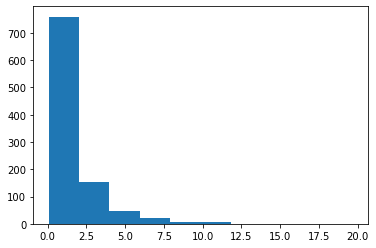

In [10]:
data = plot_exponential_data() #skewd right

(array([  8.,  33.,  83., 182., 215., 217., 153.,  74.,  31.,   4.]),
 array([-2.84528637, -2.26277091, -1.68025545, -1.09773998, -0.51522452,
         0.06729094,  0.6498064 ,  1.23232187,  1.81483733,  2.39735279,
         2.97986826]),
 <BarContainer object of 10 artists>)

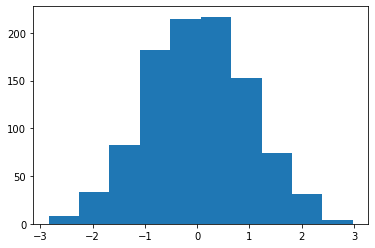

In [11]:
plt.hist(np.log(data)) #setelah di transform

#### Terapkan di Data

In [12]:
log_medv = np.log(boston_data["MEDV"])

<AxesSubplot:>

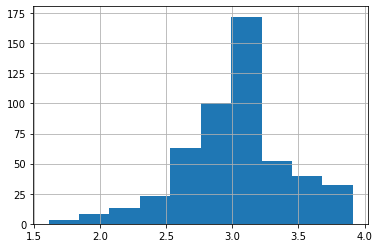

In [13]:
log_medv.hist()

In [14]:
#test normalisasi
normaltest(log_medv)

NormaltestResult(statistic=17.21801696640697, pvalue=0.00018245472768345307)

H0 masih belum bisa ditolak, karena pvalue 0.0018

### Testing Square Root
tranformasi kuadrat juga bisa mentraformasi data menajadi data yang berdistrbusi normal

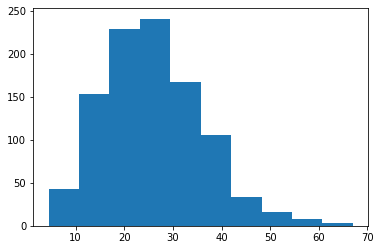

In [16]:
data = plot_square_normal_data() 
# contoh hasil
#ini histogram data yang skewed right

(array([ 13.,  33.,  98., 170., 248., 214., 148.,  50.,  20.,   6.]),
 array([2.10006642, 2.70868895, 3.31731148, 3.92593402, 4.53455655,
        5.14317908, 5.75180162, 6.36042415, 6.96904668, 7.57766921,
        8.18629175]),
 <BarContainer object of 10 artists>)

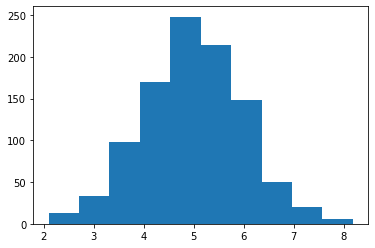

In [17]:
plt.hist(np.sqrt(data))

setelah ditraformasi data terlihat berdistribusi normal

### Terapkan pada data Boston

(array([  9.,  18.,  40.,  67., 131., 121.,  48.,  36.,  10.,  26.]),
 array([2.23606798, 2.71956796, 3.20306794, 3.68656793, 4.17006791,
        4.65356789, 5.13706788, 5.62056786, 6.10406784, 6.58756783,
        7.07106781]),
 <BarContainer object of 10 artists>)

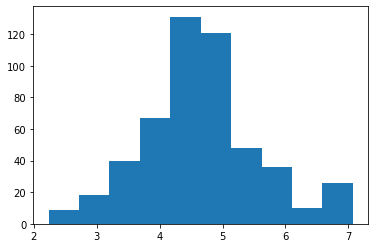

In [18]:
sqrt_medv = np.sqrt(boston_data["MEDV"])
plt.hist(sqrt_medv)

In [20]:
#cek normalisasi
normaltest(sqrt_medv)

NormaltestResult(statistic=20.487090826863067, pvalue=3.558645701429252e-05)

masih jauh dari syarat ditolaknya H0 (pvalue > 0.05)

## Box cox
Metode Box cox aadalah metode yang dirancang untuk mengusahakan perubahan distrbusi pada data menjadi normal
fungsinya
$$ \text{boxcox}(y_i) = \frac{y_i^{\lambda} - 1}{\lambda} $$

komponen lamba merupakan koefisien pendukung perubahan tranformasi, dengan library boxcox yang sudah disediakan scpy kita bisa melakukanya

In [21]:
from scipy.stats import boxcox

In [25]:
hasil_bc = boxcox(boston_data["MEDV"])

#nilai tranformasi boxcox
boxcox_medv = hasil_bc[0]
boxcox_medv

array([4.57293637, 4.36558166, 5.33694273, 5.25495447, 5.42860689,
       4.93592663, 4.48001683, 4.81796329, 3.85654088, 4.10949441,
       3.68340136, 4.10949441, 4.37457314, 4.25505556, 4.03844836,
       4.20749535, 4.49716757, 3.96522837, 4.23614226, 4.03844836,
       3.50909851, 4.17850811, 3.70724917, 3.62267296, 3.75421675,
       3.54759408, 3.86763825, 3.65930314, 4.05896259, 4.31093716,
       3.38947462, 3.62267296, 3.45672253, 3.44343457, 3.49611884,
       4.10949441, 4.21708168, 4.31093716, 4.63034334, 5.08317362,
       5.34934183, 4.77998166, 4.67854354, 4.63034334, 4.32928636,
       4.14917118, 4.21708168, 3.86763825, 3.61033098, 4.15898961,
       4.18820891, 4.26445779, 4.65455672, 4.52267685, 4.10949441,
       5.3800978 , 4.63034334, 5.1372014 , 4.51420237, 4.17850811,
       4.08940884, 3.80025017, 4.41904971, 4.65455672, 5.2292247 ,
       4.53112301, 4.15898961, 4.40135419, 3.95458193, 4.30171118,
       4.58947077, 4.37457314, 4.47139742, 4.52267685, 4.58121

In [26]:
# koefien boxcox 
lamda = hasil_bc[1]
lamda

0.2166209012915364

<AxesSubplot:>

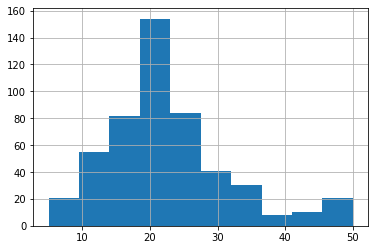

In [27]:
# lihat kembali distribusi data boston
# sebelum tranformasi
boston_data["MEDV"].hist()

(array([  4.,  15.,  17.,  49.,  68., 151.,  99.,  50.,  23.,  30.]),
 array([1.92564954, 2.3487372 , 2.77182485, 3.1949125 , 3.61800016,
        4.04108781, 4.46417546, 4.88726311, 5.31035077, 5.73343842,
        6.15652607]),
 <BarContainer object of 10 artists>)

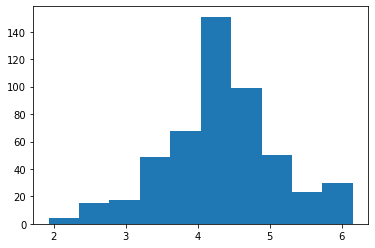

In [29]:
# bandingkan dengan setelah tranformasi boxcox
plt.hist(boxcox_medv)

terlihat bergeser kan, sekarang tes normalisasinya

In [30]:
normaltest(boxcox_medv)

NormaltestResult(statistic=4.513528775533045, pvalue=0.1046886692817602)

test boxcox menunjukan p value yang lebih besar > 0.05 maka hipotesa null dapat ditolak

## Testing Regression

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler,
                                  PolynomialFeatures)

In [34]:
# membangun model linear dengan mengambil fungsinya
lr = LinearRegression()

### Load data boston awal

In [35]:
boston_data = boston_dataframe()

### Membuat X dan y

In [36]:
X = boston_data.drop("MEDV", axis = 1)
y = boston_data["MEDV"]

### membuat polinomial feature
Polynomial features are those features created by raising existing features to an exponent. For example, if a dataset had one input feature X, then a polynomial feature would be the addition of a new feature (column) where values were calculated by squaring the values in X, e.g. X^2
<br>



In [37]:
pf = PolynomialFeatures(degree=2, include_bias=False)
X_pf = pf.fit_transform(X)

### Train Test Split

In [38]:
X_train, Xtest, y_train, y_test = train_test_split(X_pf, y, test_size = 0.3,
                                                  random_state=42)

### Fit `StandardScaler` pada X_train
StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation. StandardScaler does not meet the strict definition of scale I introduced earlier.


In [39]:
# mengubah fitur X menjadi exponen kuadrat
s = StandardScaler()
X_train_s = s.fit_transform(X_train)

### ubah y_train agar terdistibusi normal
menggunakan fitur boxcos

In [40]:
hasil_bc = boxcox(y_train)
y_train_bc = hasil_bc[0]
lamda_y_train = hasil_bc[1]

ALur pengerjaan regresi
1. Fit regresion
2. tranform data test
3. prediksi data test

In [43]:
print(X_train_s.shape)
print(y_train_bc.shape)

(354, 104)
(354,)


In [46]:
# panggil model lr (fungsi linear regression)
lr.fit(X_train_s, y_train_bc)

#operasi data data test
X_test_s = s.transform(Xtest) #tranform scaler X_test
y_pred_bc = lr.predict(X_test_s) #Prediksi y

### Melakukan Scoring pada data prediksi

#### invers tranformasi
Every transformation has an inverse transformation. The inverse transformation of $f(x) = \sqrt{x}$ is $f^{-1}(x) = x^2$, for example. Box cox has an inverse transformation as well: notice that we have to pass in the lambda value that we found from before:

In [47]:
from scipy.special import inv_boxcox

In [48]:
# contoh tranformasi
bc_result = boxcox(boston_data.MEDV)
boxcox_medv1 = bc_result[0]
lam = bc_result[1]

In [49]:
inv_boxcox(boxcox_medv1, lam)[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [50]:
boston_data["MEDV"].values[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

Sama

### melakukan tranformasi pada data test
#### y_pred_bc

In [51]:
y_pred_tranformasi = inv_boxcox(y_pred_bc, lamda_y_train)

In [53]:
r2_score(y_pred_tranformasi, y_test)

0.8082575518034532

## Coba train tanpa menggunakan tranformasi dan standardscaler

In [56]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(Xtest)
r2_score(y_pred, y_test)

0.6828427551430039

perbedaan score sangat besar